# 🧮 Teoria dos Grafos

Bem-vindo à aula de **Teoria dos Grafos**!  
Nesta aula, vamos explorar os conceitos fundamentais dos grafos, suas aplicações e exemplos práticos.

🔗 **O que é um grafo?**  
Um grafo é uma estrutura matemática usada para modelar relações entre objetos.  
Ele é composto por **vértices** (ou nós) e **arestas** (ou ligações).

## Objetivos da Aula
- Compreender o conceito de grafos
- Identificar vértices e arestas
- Visualizar exemplos práticos
- Aplicações no mundo real

✨ Vamos começar!

# ♾️ Grafos Eulerianos e Hamiltonianos

Neste capítulo, vamos abordar dois tipos importantes de grafos:

- **Grafos Eulerianos** (🔄), nomeados em homenagem a *Leonhard Euler*
- **Grafos Hamiltonianos** (🔁), nomeados em homenagem a *William Rowan Hamilton*

## O que você vai aprender:
- Teoremas para identificar grafos eulerianos
- Dois algoritmos para encontrar ciclos eulerianos
- Estudo de caso: Jogo de dominó 🎲
- Teorema de Ore: condição suficiente para grafos hamiltonianos
- Estudos de caso envolvendo grafos hamiltonianos

Vamos explorar exemplos práticos e entender como esses conceitos aparecem em situações do cotidiano!

## 🧭 Problema do Explorador e Problema do Turista

Nesta seção, vamos abordar dois problemas clássicos de caminhamento em grafos, cada um relacionado a um tipo de ciclo:

### Definição 5.1 — Problema do Explorador 🔄
Um explorador deseja encontrar um itinerário que passe por **cada estrada exatamente uma vez** e retorne ao ponto de partida.

- **Exemplo de solução:**  
  Sequência: v1, v2, v3, v6, v3, v7, v6, v5, v7, v2, v5, v4, v1

### Definição 5.2 — Problema do Turista 🔁
Um turista deseja encontrar um itinerário que visite **cada cidade exatamente uma vez** e retorne ao ponto de partida.

- **Exemplo de solução:**  
  Sequência: v1, v2, v3, v6, v7, v5, v4, v1

#### 🗺️ Ilustração
Imagine um mapa onde:
- **Vértices** representam cidades 🏙️
- **Arestas** representam estradas 🛣️

O **problema do explorador** está relacionado aos **Grafos Eulerianos** (passar por todas as arestas uma vez).  
O **problema do turista** está relacionado aos **Grafos Hamiltonianos** (passar por todos os vértices uma vez).

Vamos ver como identificar e resolver cada um desses problemas!

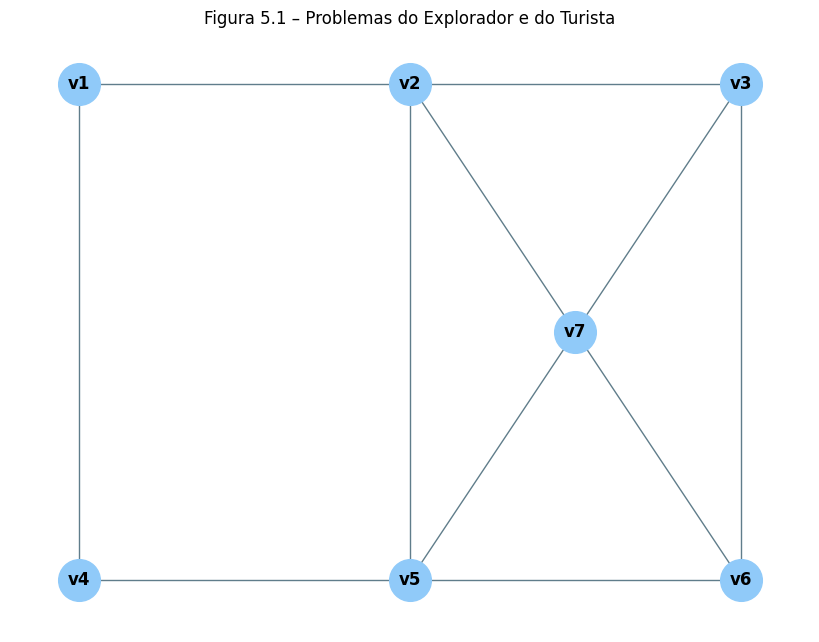

In [1]:
# Figura 5.1 – Problemas do explorador e do turista
# Plotando o grafo com cidades (vértices) e estradas (arestas)

import networkx as nx
import matplotlib.pyplot as plt

# Criação do grafo
G = nx.Graph()
# Adicionando vértices
vertices = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6']
G.add_nodes_from(vertices)
# Adicionando arestas (estradas)
arestas = [
    ('v1', 'v2'), ('v1', 'v4'),
    ('v2', 'v3'), ('v2', 'v5'), ('v2', 'v7'),
    ('v3', 'v6'), ('v3', 'v7'),
    ('v4', 'v5'),
    ('v5', 'v6'), ('v5', 'v7'),
    ('v6', 'v7')
]
# Adicionando v7 para completar o exemplo das sequências
G.add_node('v7')
G.add_edges_from(arestas)

# Layout para melhor visualização
pos = {
    'v1': (-2, 2),
    'v2': (0, 2),
    'v3': (2, 2),
    'v4': (-2, 0),
    'v5': (0, 0),
    'v6': (2, 0),
    'v7': (1, 1)
}

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color="#90caf9", node_size=900, font_weight='bold', edge_color="#607d8b")
plt.title("Figura 5.1 – Problemas do Explorador e do Turista")
plt.show()

## 🔄 Grafos e Ciclos Eulerianos

Vamos agora explorar o famoso **Problema das Pontes de Königsberg**, estudado por Leonhard Euler no século XVIII.

Euler investigou se era possível atravessar todas as 7 pontes de Königsberg **apenas uma vez**, retornando ao ponto de partida.  
Sua análise levou à criação de conceitos fundamentais em grafos, especialmente o **grau dos vértices**.

### 📏 Grau de um vértice
O grau de um vértice é o número de arestas que incidem sobre ele.

### 📐 Teorema 5.1 — Lema do Aperto de Mão (Handshaking Lemma)
Para qualquer grafo $G$, a soma dos graus de todos os seus vértices é igual ao dobro do número de arestas.

$$
\sum_{v \in V(G)} \deg(v) = 2|E(G)|
$$

Onde:
- $V(G)$: conjunto de vértices do grafo $G$
- $E(G)$: conjunto de arestas do grafo $G$

Este resultado é fundamental para entender ciclos e caminhos em grafos!

### Consequências dos Teoremas de Euler

A partir do Lema do Aperto de Mão, temos:

#### 🔢 Teorema 5.2
Todo grafo $G$ tem um **número par de vértices de grau ímpar**.

**Prova (intuitiva):**  
Se somarmos todos os graus dos vértices, cada aresta é contada duas vezes.  
Como a soma é par, o número de vértices com grau ímpar também deve ser par.

---

#### 🔁 Teorema 5.3 (Grafos Dirigidos)
Seja $G = (V, E)$ um grafo dirigido. Então:

$$
|E| = \sum_{i=1}^n \text{grau}_e(v_i) = \sum_{i=1}^n \text{grau}_s(v_i) = m
$$

- $\text{grau}_e(v_i)$: grau de entrada do vértice $v_i$
- $\text{grau}_s(v_i)$: grau de saída do vértice $v_i$
- $m$: número de arestas

---

## 🌀 Definição — Ciclo e Grafo Euleriano

- Um **grafo conexo** é **euleriano** se contiver uma trilha fechada que inclua **todas as suas arestas**.
- Essa trilha é chamada de **Ciclo Euleriano**.

### Como identificar um grafo euleriano?

- **Todos os vértices devem ter grau par.**
- Se isso acontecer, o grafo pode ser decomposto em ciclos disjuntos (sem arestas em comum).

#### 🔎 Resumo visual:
- Grau par em todos os vértices → Grafo euleriano → Possui ciclo euleriano

Vamos ver exemplos práticos e como aplicar esses teoremas!

### 🧩 Prova do Teorema dos Ciclos Disjuntos

Segundo Aldous, Best e Wilson (2003):

- Se $G$ é um grafo conexo com todos os vértices de grau par, podemos encontrar um ciclo partindo de qualquer vértice e seguindo arestas sem repeti-las.
- Como todos os vértices têm grau par, sempre é possível entrar e sair de cada vértice por arestas diferentes.
- Eventualmente, retornamos a um vértice já visitado, formando um ciclo $C_1$.
- Removendo as arestas de $C_1$, obtemos um novo grafo (possivelmente não conexo), mas ainda com todos os vértices de grau par.
- Se restarem arestas, repetimos o processo, formando ciclos $C_2, C_3, \ldots$ até não restarem mais arestas.
- Assim, o grafo pode ser decomposto em ciclos disjuntos (sem arestas em comum).

---

### 📝 Exemplo 5.1

Todos os vértices do grafo da Figura 5.3 possuem grau par.  
Ele pode ser decomposto em 4, 3 ou 2 ciclos disjuntos de arestas, cada um representado por um tipo diferente de linha.

---

## 🏆 Teorema de Euler — Grafo Euleriano

**Teorema 5.5:**  
Um grafo conexo é **euleriano** se, e somente se, **todos os seus vértices têm grau par**.

---

## 🔄 Teorema dos Ciclos Eulerianos

**Teorema 5.6:**  
Um grafo euleriano pode ser decomposto em ciclos, de forma que nenhum par de ciclos tenha alguma aresta em comum.

---

## 🟡 Grafos Semi-eulerianos

**Teorema 5.7:**  
Um grafo conexo é **semi-euleriano** se, e somente se, **exatamente dois de seus vértices têm grau ímpar**.

### Definição — Caminho Semi-euleriano

Um **caminho semi-euleriano** é uma trilha aberta que inclui todas as arestas do grafo.

---

### 📝 Exemplo 5.2

O grafo da Figura 5.4 é semi-euleriano:  
É conexo e todos os vértices têm grau par, exceto $e$ e $f$, que têm grau 3.

Uma trilha euleriana (ou caminho euleriano) neste grafo:  
$e, b, a, c, b, d, e, c, f, d, c, f$

In [2]:
# Renderizar e salvar as equações matemáticas como imagens para uso nos slides

import matplotlib.pyplot as plt

def salvar_equacao(equacao, nome_arquivo):
    fig, ax = plt.subplots(figsize=(5, 1))
    ax.axis('off')
    plt.text(0.5, 0.5, f"${equacao}$", fontsize=24, ha='center', va='center')
    plt.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.2, transparent=True)
    plt.close()

# Exemplo: Lema do Aperto de Mão
salvar_equacao(r"\sum_{v \in V(G)} \deg(v) = 2|E(G)|", "lema_aperto_mao.png")

salvar_equacao(r"\text{grau}_e(v_i):\ \text{grau de entrada do vértice}\ v_i", "grau_entrada.png")
salvar_equacao(r"\text{grau}_s(v_i):\ \text{grau de saída do vértice}\ v_i", "grau_saida.png")
salvar_equacao(r"m:\ \text{número de arestas}", "numero_arestas.png")


# Exemplo: Teorema dos Graus de Entrada e Saída
salvar_equacao(r"|E| = \sum_{i=1}^n \mathrm{grau}_e(v_i) = \sum_{i=1}^n \mathrm{grau}_s(v_i) = m", "graus_entrada_saida.png")

salvar_equacao(r"V(G):\ \text{conjunto de vértices do grafo}\ G", "conjunto_vertices.png")
salvar_equacao(r"E(G):\ \text{conjunto de arestas do grafo}\ G", "conjunto_arestas.png")

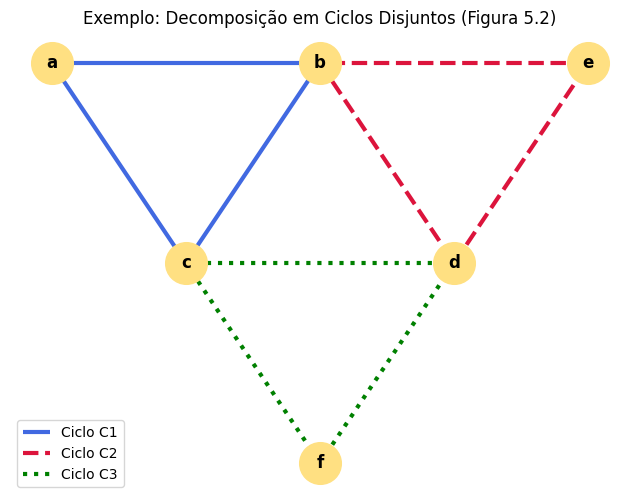

In [3]:
# Exemplo visual do Teorema dos Ciclos Disjuntos (Figura 5.2)
import networkx as nx
import matplotlib.pyplot as plt

# Grafo exemplo: todos os vértices com grau par
G_ex = nx.Graph()
edges_ex = [
    ('a', 'b'), ('b', 'c'), ('c', 'a'),  # ciclo C1
    ('b', 'd'), ('d', 'e'), ('e', 'b'),  # ciclo C2
    ('c', 'f'), ('f', 'd'), ('d', 'c')   # ciclo C3
]
G_ex.add_edges_from(edges_ex)

# Layout manual para melhor visualização dos ciclos
pos_ex = {
    'a': (0, 2),
    'b': (2, 2),
    'c': (1, 0.5),
    'd': (3, 0.5),
    'e': (4, 2),
    'f': (2, -1)
}

plt.figure(figsize=(8,6))

# Desenhar ciclos com estilos diferentes
nx.draw_networkx_edges(G_ex, pos_ex, edgelist=[('a','b'),('b','c'),('c','a')], width=3, edge_color='royalblue', style='solid', label='Ciclo C1')
nx.draw_networkx_edges(G_ex, pos_ex, edgelist=[('b','d'),('d','e'),('e','b')], width=3, edge_color='crimson', style='dashed', label='Ciclo C2')
nx.draw_networkx_edges(G_ex, pos_ex, edgelist=[('c','f'),('f','d'),('d','c')], width=3, edge_color='green', style='dotted', label='Ciclo C3')
nx.draw_networkx_nodes(G_ex, pos_ex, node_color="#ffe082", node_size=900)
nx.draw_networkx_labels(G_ex, pos_ex, font_weight='bold')

plt.title("Exemplo: Decomposição em Ciclos Disjuntos (Figura 5.2)")
plt.axis('off')
plt.legend(["Ciclo C1", "Ciclo C2", "Ciclo C3"])
plt.show()

## 🌀 Decomposição em Ciclos Disjuntos — Passo a Passo

Vamos visualizar como um grafo com todos os vértices de grau par pode ser decomposto em ciclos disjuntos, conforme o Teorema dos Ciclos Disjuntos:

### 1️⃣ Passo 1: Encontrar o primeiro ciclo (C1)
- Partimos de um vértice arbitrário e seguimos arestas sem repeti-las.
- Como todos os vértices têm grau par, sempre conseguimos sair por outra aresta.
- Eventualmente, retornamos ao ponto inicial, formando o ciclo **C1**.

### 2️⃣ Passo 2: Remover as arestas de C1 e buscar novo ciclo (C2)
- Removemos as arestas de **C1** do grafo.
- Se restarem arestas, repetimos o processo em outro componente, formando o ciclo **C2**, que não compartilha arestas com **C1**.

### 3️⃣ Passo 3: Repetir até acabar as arestas
- Continuamos removendo as arestas dos ciclos encontrados (**C3**, **C4**, ...).
- O processo termina quando todas as arestas do grafo foram usadas em algum ciclo.

---

### 🎯 Resumo Visual

- Cada ciclo encontrado é independente (não compartilha arestas com os outros).
- No final, todos os ciclos juntos cobrem todas as arestas do grafo.

> **Esta decomposição é a base para algoritmos de busca de ciclos eulerianos!**

Veja o exemplo visual ao lado para entender como os ciclos são formados e removidos.

# 🧮 Teoria dos Grafos

Bem-vindo à aula de **Teoria dos Grafos**!  
Nesta aula, vamos explorar os conceitos fundamentais dos grafos, suas aplicações e exemplos práticos.

🔗 **O que é um grafo?**  
Um grafo é uma estrutura matemática usada para modelar relações entre objetos.  
Ele é composto por **vértices** (ou nós) e **arestas** (ou ligações).

## Objetivos da Aula
- Compreender o conceito de grafos
- Identificar vértices e arestas
- Visualizar exemplos práticos
- Aplicações no mundo real

✨ Vamos começar!

# ♾️ Grafos Eulerianos e Hamiltonianos

Neste capítulo, vamos abordar dois tipos importantes de grafos:

- **Grafos Eulerianos** (🔄), nomeados em homenagem a *Leonhard Euler*
- **Grafos Hamiltonianos** (🔁), nomeados em homenagem a *William Rowan Hamilton*

## O que você vai aprender:
- Teoremas para identificar grafos eulerianos
- Dois algoritmos para encontrar ciclos eulerianos
- Estudo de caso: Jogo de dominó 🎲
- Teorema de Ore: condição suficiente para grafos hamiltonianos
- Estudos de caso envolvendo grafos hamiltonianos

Vamos explorar exemplos práticos e entender como esses conceitos aparecem em situações do cotidiano!

## 🧭 Problema do Explorador e Problema do Turista

Nesta seção, vamos abordar dois problemas clássicos de caminhamento em grafos, cada um relacionado a um tipo de ciclo:

### Definição 5.1 — Problema do Explorador 🔄
Um explorador deseja encontrar um itinerário que passe por **cada estrada exatamente uma vez** e retorne ao ponto de partida.

- **Exemplo de solução:**  
  Sequência: v1, v2, v3, v6, v3, v7, v6, v5, v7, v2, v5, v4, v1

### Definição 5.2 — Problema do Turista 🔁
Um turista deseja encontrar um itinerário que visite **cada cidade exatamente uma vez** e retorne ao ponto de partida.

- **Exemplo de solução:**  
  Sequência: v1, v2, v3, v6, v7, v5, v4, v1

#### 🗺️ Ilustração
Imagine um mapa onde:
- **Vértices** representam cidades 🏙️
- **Arestas** representam estradas 🛣️

O **problema do explorador** está relacionado aos **Grafos Eulerianos** (passar por todas as arestas uma vez).  
O **problema do turista** está relacionado aos **Grafos Hamiltonianos** (passar por todos os vértices uma vez).

Vamos ver como identificar e resolver cada um desses problemas!

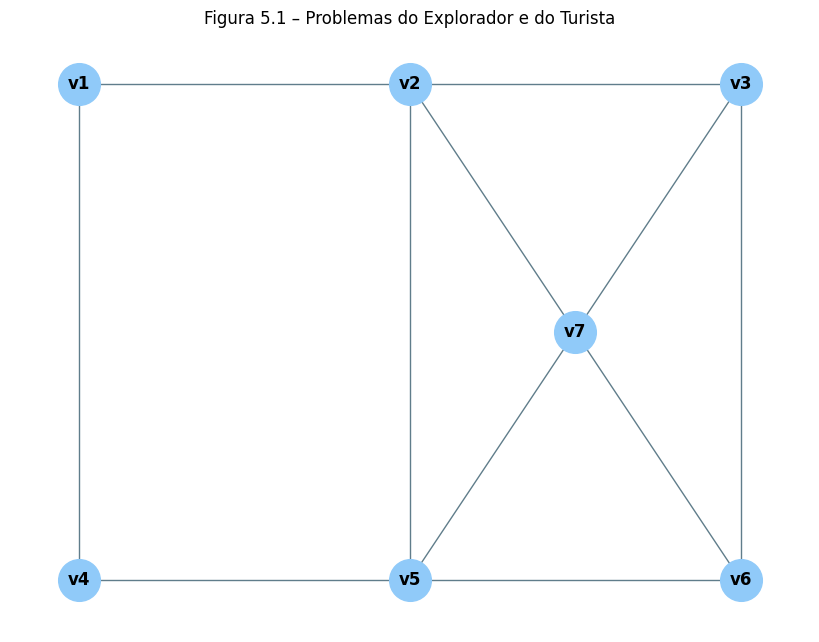

In [4]:
# Figura 5.1 – Problemas do explorador e do turista
# Plotando o grafo com cidades (vértices) e estradas (arestas)

import networkx as nx
import matplotlib.pyplot as plt

# Criação do grafo
G = nx.Graph()
# Adicionando vértices
vertices = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6']
G.add_nodes_from(vertices)
# Adicionando arestas (estradas)
arestas = [
    ('v1', 'v2'), ('v1', 'v4'),
    ('v2', 'v3'), ('v2', 'v5'), ('v2', 'v7'),
    ('v3', 'v6'), ('v3', 'v7'),
    ('v4', 'v5'),
    ('v5', 'v6'), ('v5', 'v7'),
    ('v6', 'v7')
]
# Adicionando v7 para completar o exemplo das sequências
G.add_node('v7')
G.add_edges_from(arestas)

# Layout para melhor visualização
pos = {
    'v1': (-2, 2),
    'v2': (0, 2),
    'v3': (2, 2),
    'v4': (-2, 0),
    'v5': (0, 0),
    'v6': (2, 0),
    'v7': (1, 1)
}

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color="#90caf9", node_size=900, font_weight='bold', edge_color="#607d8b")
plt.title("Figura 5.1 – Problemas do Explorador e do Turista")
plt.show()

## 🔄 Grafos e Ciclos Eulerianos

Vamos agora explorar o famoso **Problema das Pontes de Königsberg**, estudado por Leonhard Euler no século XVIII.

Euler investigou se era possível atravessar todas as 7 pontes de Königsberg **apenas uma vez**, retornando ao ponto de partida.  
Sua análise levou à criação de conceitos fundamentais em grafos, especialmente o **grau dos vértices**.

### 📏 Grau de um vértice
O grau de um vértice é o número de arestas que incidem sobre ele.

### 📐 Teorema 5.1 — Lema do Aperto de Mão (Handshaking Lemma)
Para qualquer grafo $G$, a soma dos graus de todos os seus vértices é igual ao dobro do número de arestas.

$$
\sum_{v \in V(G)} \deg(v) = 2|E(G)|
$$

Onde:
- $V(G)$: conjunto de vértices do grafo $G$
- $E(G)$: conjunto de arestas do grafo $G$

Este resultado é fundamental para entender ciclos e caminhos em grafos!

### Consequências dos Teoremas de Euler

A partir do Lema do Aperto de Mão, temos:

#### 🔢 Teorema 5.2
Todo grafo $G$ tem um **número par de vértices de grau ímpar**.

**Prova (intuitiva):**  
Se somarmos todos os graus dos vértices, cada aresta é contada duas vezes.  
Como a soma é par, o número de vértices com grau ímpar também deve ser par.

---

#### 🔁 Teorema 5.3 (Grafos Dirigidos)
Seja $G = (V, E)$ um grafo dirigido. Então:

$$
|E| = \sum_{i=1}^n \text{grau}_e(v_i) = \sum_{i=1}^n \text{grau}_s(v_i) = m
$$

- $\text{grau}_e(v_i)$: grau de entrada do vértice $v_i$
- $\text{grau}_s(v_i)$: grau de saída do vértice $v_i$
- $m$: número de arestas

---

## 🌀 Definição — Ciclo e Grafo Euleriano

- Um **grafo conexo** é **euleriano** se contiver uma trilha fechada que inclua **todas as suas arestas**.
- Essa trilha é chamada de **Ciclo Euleriano**.

### Como identificar um grafo euleriano?

- **Todos os vértices devem ter grau par.**
- Se isso acontecer, o grafo pode ser decomposto em ciclos disjuntos (sem arestas em comum).

#### 🔎 Resumo visual:
- Grau par em todos os vértices → Grafo euleriano → Possui ciclo euleriano

Vamos ver exemplos práticos e como aplicar esses teoremas!

### 🧩 Prova do Teorema dos Ciclos Disjuntos

Segundo Aldous, Best e Wilson (2003):

- Se $G$ é um grafo conexo com todos os vértices de grau par, podemos encontrar um ciclo partindo de qualquer vértice e seguindo arestas sem repeti-las.
- Como todos os vértices têm grau par, sempre é possível entrar e sair de cada vértice por arestas diferentes.
- Eventualmente, retornamos a um vértice já visitado, formando um ciclo $C_1$.
- Removendo as arestas de $C_1$, obtemos um novo grafo (possivelmente não conexo), mas ainda com todos os vértices de grau par.
- Se restarem arestas, repetimos o processo, formando ciclos $C_2, C_3, \ldots$ até não restarem mais arestas.
- Assim, o grafo pode ser decomposto em ciclos disjuntos (sem arestas em comum).

---

### 📝 Exemplo 5.1

Todos os vértices do grafo da Figura 5.3 possuem grau par.  
Ele pode ser decomposto em 4, 3 ou 2 ciclos disjuntos de arestas, cada um representado por um tipo diferente de linha.

---

## 🏆 Teorema de Euler — Grafo Euleriano

**Teorema 5.5:**  
Um grafo conexo é **euleriano** se, e somente se, **todos os seus vértices têm grau par**.

---

## 🔄 Teorema dos Ciclos Eulerianos

**Teorema 5.6:**  
Um grafo euleriano pode ser decomposto em ciclos, de forma que nenhum par de ciclos tenha alguma aresta em comum.

---

## 🟡 Grafos Semi-eulerianos

**Teorema 5.7:**  
Um grafo conexo é **semi-euleriano** se, e somente se, **exatamente dois de seus vértices têm grau ímpar**.

### Definição — Caminho Semi-euleriano

Um **caminho semi-euleriano** é uma trilha aberta que inclui todas as arestas do grafo.

---

### 📝 Exemplo 5.2

O grafo da Figura 5.4 é semi-euleriano:  
É conexo e todos os vértices têm grau par, exceto $e$ e $f$, que têm grau 3.

Uma trilha euleriana (ou caminho euleriano) neste grafo:  
$e, b, a, c, b, d, e, c, f, d, c, f$

In [5]:
# Renderizar e salvar as equações matemáticas como imagens para uso nos slides

import matplotlib.pyplot as plt

def salvar_equacao(equacao, nome_arquivo):
    fig, ax = plt.subplots(figsize=(5, 1))
    ax.axis('off')
    plt.text(0.5, 0.5, f"${equacao}$", fontsize=24, ha='center', va='center')
    plt.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.2, transparent=True)
    plt.close()

# Exemplo: Lema do Aperto de Mão
salvar_equacao(r"\sum_{v \in V(G)} \deg(v) = 2|E(G)|", "lema_aperto_mao.png")

salvar_equacao(r"\text{grau}_e(v_i):\ \text{grau de entrada do vértice}\ v_i", "grau_entrada.png")
salvar_equacao(r"\text{grau}_s(v_i):\ \text{grau de saída do vértice}\ v_i", "grau_saida.png")
salvar_equacao(r"m:\ \text{número de arestas}", "numero_arestas.png")


# Exemplo: Teorema dos Graus de Entrada e Saída
salvar_equacao(r"|E| = \sum_{i=1}^n \mathrm{grau}_e(v_i) = \sum_{i=1}^n \mathrm{grau}_s(v_i) = m", "graus_entrada_saida.png")

salvar_equacao(r"V(G):\ \text{conjunto de vértices do grafo}\ G", "conjunto_vertices.png")
salvar_equacao(r"E(G):\ \text{conjunto de arestas do grafo}\ G", "conjunto_arestas.png")

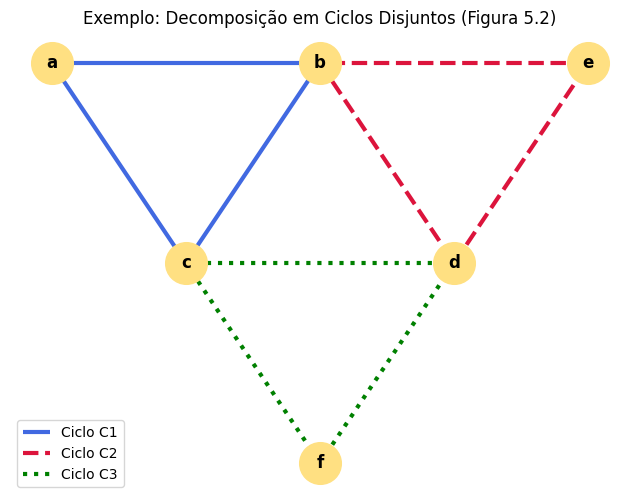

In [6]:
# Exemplo visual do Teorema dos Ciclos Disjuntos (Figura 5.2)
import networkx as nx
import matplotlib.pyplot as plt

# Grafo exemplo: todos os vértices com grau par
G_ex = nx.Graph()
edges_ex = [
    ('a', 'b'), ('b', 'c'), ('c', 'a'),  # ciclo C1
    ('b', 'd'), ('d', 'e'), ('e', 'b'),  # ciclo C2
    ('c', 'f'), ('f', 'd'), ('d', 'c')   # ciclo C3
]
G_ex.add_edges_from(edges_ex)

# Layout manual para melhor visualização dos ciclos
pos_ex = {
    'a': (0, 2),
    'b': (2, 2),
    'c': (1, 0.5),
    'd': (3, 0.5),
    'e': (4, 2),
    'f': (2, -1)
}

plt.figure(figsize=(8,6))

# Desenhar ciclos com estilos diferentes
nx.draw_networkx_edges(G_ex, pos_ex, edgelist=[('a','b'),('b','c'),('c','a')], width=3, edge_color='royalblue', style='solid', label='Ciclo C1')
nx.draw_networkx_edges(G_ex, pos_ex, edgelist=[('b','d'),('d','e'),('e','b')], width=3, edge_color='crimson', style='dashed', label='Ciclo C2')
nx.draw_networkx_edges(G_ex, pos_ex, edgelist=[('c','f'),('f','d'),('d','c')], width=3, edge_color='green', style='dotted', label='Ciclo C3')
nx.draw_networkx_nodes(G_ex, pos_ex, node_color="#ffe082", node_size=900)
nx.draw_networkx_labels(G_ex, pos_ex, font_weight='bold')

plt.title("Exemplo: Decomposição em Ciclos Disjuntos (Figura 5.2)")
plt.axis('off')
plt.legend(["Ciclo C1", "Ciclo C2", "Ciclo C3"])
plt.show()

## 🌀 Decomposição em Ciclos Disjuntos — Passo a Passo

Vamos visualizar como um grafo com todos os vértices de grau par pode ser decomposto em ciclos disjuntos, conforme o Teorema dos Ciclos Disjuntos:

### 1️⃣ Passo 1: Encontrar o primeiro ciclo (C1)
- Partimos de um vértice arbitrário e seguimos arestas sem repeti-las.
- Como todos os vértices têm grau par, sempre conseguimos sair por outra aresta.
- Eventualmente, retornamos ao ponto inicial, formando o ciclo **C1**.

### 2️⃣ Passo 2: Remover as arestas de C1 e buscar novo ciclo (C2)
- Removemos as arestas de **C1** do grafo.
- Se restarem arestas, repetimos o processo em outro componente, formando o ciclo **C2**, que não compartilha arestas com **C1**.

### 3️⃣ Passo 3: Repetir até acabar as arestas
- Continuamos removendo as arestas dos ciclos encontrados (**C3**, **C4**, ...).
- O processo termina quando todas as arestas do grafo foram usadas em algum ciclo.

---

### 🎯 Resumo Visual

- Cada ciclo encontrado é independente (não compartilha arestas com os outros).
- No final, todos os ciclos juntos cobrem todas as arestas do grafo.

> **Esta decomposição é a base para algoritmos de busca de ciclos eulerianos!**

Veja o exemplo visual ao lado para entender como os ciclos são formados e removidos.

## 5.3 Grafos e Ciclos Hamiltonianos

Os **Grafos e Ciclos Hamiltonianos** receberam este nome em homenagem ao matemático e astrônomo irlandês William Rowan Hamilton. Em 1857, Hamilton inventou o “Jogo Icosiano”, que consistia em encontrar um ciclo hamiltoniano em um dodecaedro regular. O objetivo era inserir pinos e barbantes em um dodecaedro de madeira, formando um caminho fechado que passasse apenas uma vez em cada vértice.

---

## 📐 Definição Formal

<div style="font-size:1.2em">

**Definição:**  
Um grafo conexo $G$ é **hamiltoniano** se contiver um ciclo que inclua cada um de seus vértices exatamente uma vez.  
Tal ciclo é chamado de **Ciclo Hamiltoniano**.

</div>

---

## 🧩 Exemplo Clássico: O Jogo Icosiano

Abaixo, veja uma solução para o jogo icosiano, representando um ciclo Hamiltoniano em um dodecaedro regular (vértices de A a T):

**Sequência:**  
A → B → C → D → E → H → G → F → O → N → M → L → K → S → T → P → Q → R → I → J → A


d:\GitHub\NewtonPaiva\TeoriaGrafos\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


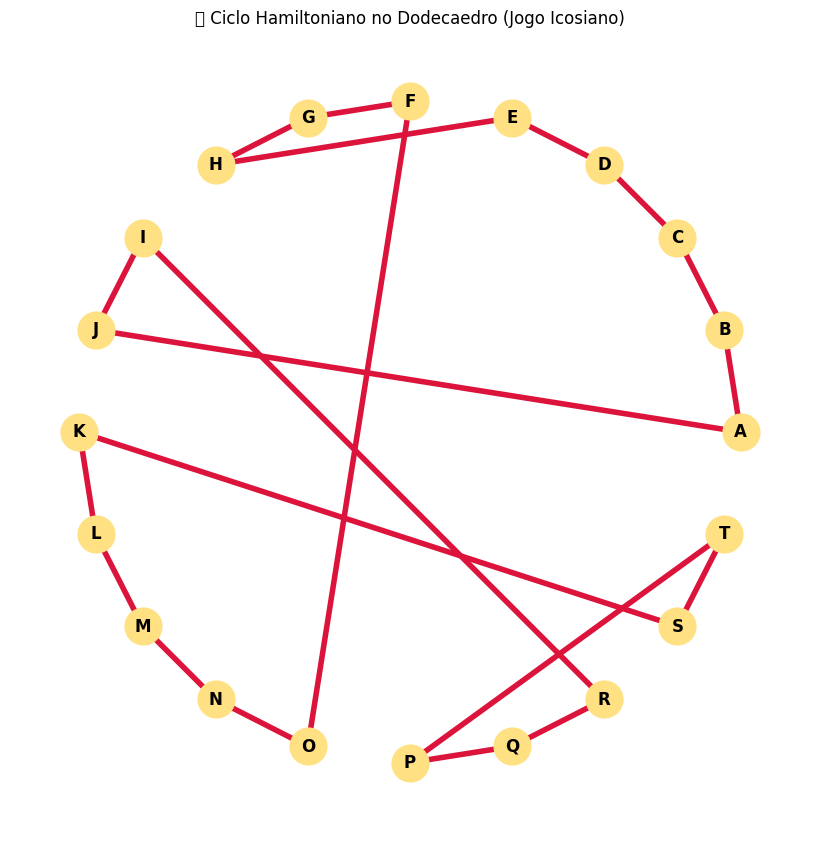

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Lista dos vértices do dodecaedro
vertices = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'
]

# Ciclo Hamiltoniano conforme a solução apresentada
ciclo_hamiltoniano = [
    ('A','B'), ('B','C'), ('C','D'), ('D','E'), ('E','H'), ('H','G'), ('G','F'),
    ('F','O'), ('O','N'), ('N','M'), ('M','L'), ('L','K'), ('K','S'), ('S','T'),
    ('T','P'), ('P','Q'), ('Q','R'), ('R','I'), ('I','J'), ('J','A')
]

# Grafo do ciclo Hamiltoniano
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(ciclo_hamiltoniano)

# Layout circular para visualização
pos = nx.circular_layout(G)
plt.figure(figsize=(8,8))
nx.draw(G, pos, with_labels=True, node_color="#ffe082", node_size=700, font_weight='bold', edge_color="#bdbdbd")
nx.draw_networkx_edges(G, pos, edgelist=ciclo_hamiltoniano, width=4, edge_color='crimson')
plt.title("🔁 Ciclo Hamiltoniano no Dodecaedro (Jogo Icosiano)")
plt.show()

### Determinação de Grafos Hamiltonianos

O problema de determinar se um grafo é hamiltoniano pode parecer, à primeira vista, similar ao problema de decidir se um determinado grafo é euleriano. A princípio, esperamos que haja alguma propriedade que nos dê de forma direta esta resposta, tal qual àquelas que levaram à formulação dos teoremas para ciclos eulerianos. Entretanto, no caso de grafos hamiltonianos **não há uma resposta fácil e direta**.

Uma primeira abordagem para determinar se um grafo é hamiltoniano consiste em tentar classificá-lo em alguma categoria especial de grafo. Por exemplo, sabemos que o **grafo completo** $K_5$ é hamiltoniano, pois, havendo arestas entre todos os pares de vértices, sabemos que ao chegar em determinado vértice, sempre podemos ir diretamente a um outro vértice ainda não visitado, até completar o ciclo hamiltoniano.


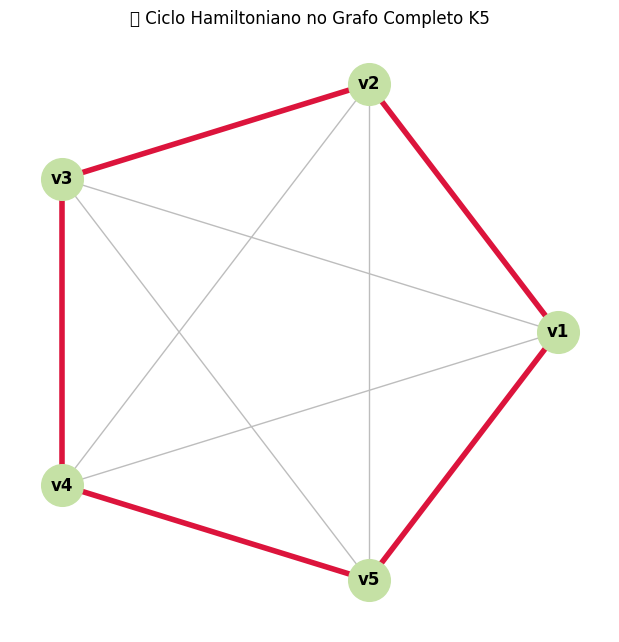

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Grafo completo K5
K5 = nx.complete_graph(5)
labels = {i: f'v{i+1}' for i in range(5)}
nx.relabel_nodes(K5, labels, copy=False)

# Um ciclo hamiltoniano em K5: v1-v2-v3-v4-v5-v1
hamiltonian_cycle = [('v1','v2'), ('v2','v3'), ('v3','v4'), ('v4','v5'), ('v5','v1')]

pos = nx.circular_layout(K5)
plt.figure(figsize=(6,6))
nx.draw(K5, pos, with_labels=True, node_color="#c5e1a5", node_size=900, font_weight='bold', edge_color="#bdbdbd")
nx.draw_networkx_edges(K5, pos, edgelist=hamiltonian_cycle, width=4, edge_color='crimson')
plt.title("🔁 Ciclo Hamiltoniano no Grafo Completo K5")
plt.show()

Além disso, ao adicionarmos uma aresta a um grafo hamiltoniano, ele continua sendo hamiltoniano, pois o ciclo hamiltoniano continua existindo após a adição da aresta. Intuitivamente, isso nos traz a noção de que grafos mais densos (isto é, com mais arestas) provavelmente têm mais chance de serem hamiltonianos.

---

### Teorema de Ore

Em 1960, o matemático norueguês Øystein Ore provou o seguinte teorema, relacionando graus de vértices à propriedade de um grafo ser hamiltoniano:

**Teorema 5.8 (Teorema de Ore):**  
Seja $G$ um grafo simples conexo com $n$ vértices, em que $n \geq 3$, e $\deg(u) + \deg(v) \geq n$, para cada par de vértices não adjacentes $u$ e $v$. Então $G$ é hamiltoniano.

> Note que o teorema mostra uma condição suficiente, mas não necessária para que um grafo seja hamiltoniano. Ou seja, pode haver grafos hamiltonianos que não atendem ao teorema de Ore.

---

### Exemplo: Aplicação do Teorema de Ore

Considere dois grafos com $n = 5$ vértices:

- No primeiro, para todos os pares de vértices não adjacentes, $\deg(a) + \deg(c) = 5 \geq n$ e $\deg(a) + \deg(d) = 5 \geq n$. Portanto, o grafo é hamiltoniano pelo teorema de Ore.
- No segundo, $\deg(a) + \deg(c) = 4 < n$. Mesmo assim, é possível encontrar um ciclo hamiltoniano: $a, b, c, d, e, a$.

> Se for necessário utilizar o teorema de Ore em um multigrafo, basta reduzi-lo a um grafo simples removendo todos os seus laços e arestas paralelas. Se o grafo simples for hamiltoniano, o multigrafo original também o será.

---

O problema de encontrar ciclos hamiltonianos pode ser simples para algumas classes especiais de grafos (grafos ciclo e grafos completos, por exemplo). Porém, no caso geral, trata-se de um problema extremamente difícil, cuja complexidade é não polinomial.